# PART-1

## 1. Import required libraries and read the dataset.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [136]:
df=pd.read_csv(r"Apps_data+(1).csv")

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [137]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1937,Cover Fire: offline shooting games for free,GAME,4.7,725897,31M,"10,000,000+",Free,0,Teen,Action,"August 3, 2018",1.8.20,4.1 and up


In [138]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [139]:
df.shape

(10841, 13)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [141]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
for i in df.columns:
    print(i)
    print(df[i].unique())

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews
['159' '967' '87510' ... '603' '1195' '398307']
Size
[

In [143]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Remove 1.9 from 'category'
#### Remove 'Varies with device' from 'size'
#### Remove null values from 'Rating','Type','Content Rating','Current Ver','Android Ver'
#### Remove 'Everyone' from 'price'
#### Remove 'Varies with device' from 'Android ver'

## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [144]:
df.duplicated().sum()

483

#### There are 483 duplicated rows

In [145]:
df.drop_duplicates(inplace=True)
df.shape

(10358, 13)

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [146]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [147]:
df.drop(df[df['Category']=='1.9'].index,inplace=True)
df.shape

(10357, 13)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [148]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [149]:
df['Rating'].isna().sum()

1465

In [150]:
df.dropna(subset=['Rating'],inplace=True)
df.shape

(8892, 13)

In [151]:
df['Rating_category']=np.where(df['Rating']>3.5,'high','low')

## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [152]:
df['Rating_category'].value_counts()

Rating_category
high    8012
low      880
Name: count, dtype: int64

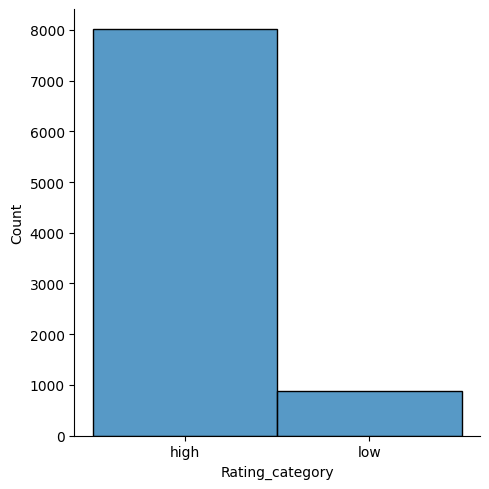

In [153]:
sns.displot(df['Rating_category'])

#### There are 8012 values that have more than 3.5 Rating and 880 that have less than 3.5

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


<Axes: ylabel='Reviews'>

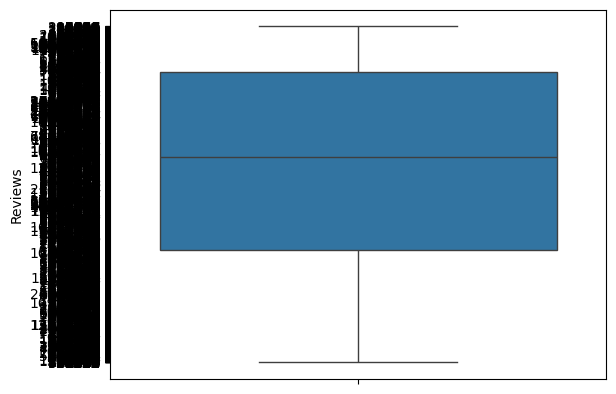

In [154]:
sns.boxplot(df['Reviews'])

In [155]:
df['Reviews']=df['Reviews'].astype('int')
df.skew(numeric_only=True)

Rating     -1.823517
Reviews    16.207669
dtype: float64

In [156]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

In [157]:
df['Reviews']=np.log1p(df['Reviews'])
df.skew(numeric_only=True)

Rating    -1.823517
Reviews   -0.014711
dtype: float64

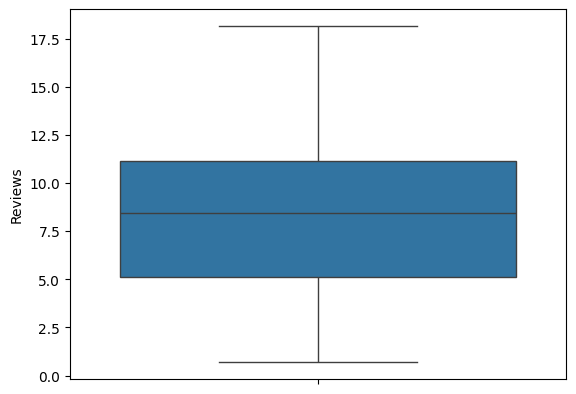

In [158]:
sns.boxplot(df['Reviews'])
plt.show()

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [159]:
len(df[df['Size']=='Varies with device'])

1468

In [160]:
df.drop(df[df['Size']=='Varies with device'].index,inplace=True)
df.shape

(7424, 14)

In [161]:
print(df['Size'].unique())

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M'
 '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' '9.4M' '15M' '10M' '1.2M' '26M'
 '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M' '5.7M' '8.6M' '2.4M'
 '27M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M' '2.9M' '38M' '32M' '5.4M'
 '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M' '6.7M' '30M' '2.6M' '7.1M'
 '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M'
 '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M' '55M' '23k' '7.3M' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '3.7M' '118k' '44M'
 '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M' '7.2M' '5.8M' '3.8M' '9.6M'
 '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M' '8.1M' '36M' '6.9M' '7.4M'
 '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'
 '59M' '9.7M' '78M' '72M' '43M' '7.7M' '6.3M' '33

In [162]:
df['Size'].dtype

dtype('O')

In [163]:
df['Size']=df['Size'].replace({'M':'*1000000','k':'*1000'},regex=True).map(eval)

In [164]:
df['Size'].dtype

dtype('float64')

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [165]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [166]:
df['Installs']=df['Installs'].str.replace('+','').str.replace(",","").astype('int')
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [167]:
print(sorted(df['Price'].unique()))

['$0.99', '$1.00', '$1.20', '$1.29', '$1.49', '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.97', '$1.99', '$10.00', '$10.99', '$11.99', '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.99', '$2.00', '$2.49', '$2.56', '$2.59', '$2.90', '$2.99', '$24.99', '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49', '$3.88', '$3.99', '$33.99', '$37.99', '$379.99', '$389.99', '$39.99', '$399.99', '$4.29', '$4.49', '$4.60', '$4.77', '$4.84', '$4.99', '$400.00', '$5.49', '$5.99', '$6.49', '$6.99', '$7.49', '$7.99', '$79.99', '$8.49', '$8.99', '$9.00', '$9.99', '0']


In [168]:
df['Price']=df['Price'].str.replace('$','').astype('float')

In [169]:
print(sorted(df['Price'].unique()))

[0.0, 0.99, 1.0, 1.2, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.97, 1.99, 2.0, 2.49, 2.56, 2.59, 2.9, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.88, 3.99, 4.29, 4.49, 4.6, 4.77, 4.84, 4.99, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.99, 24.99, 29.99, 33.99, 37.99, 39.99, 79.99, 299.99, 379.99, 389.99, 399.99, 400.0]


## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [170]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [171]:
df.drop(columns=['App','Rating','Genres','Last Updated','Current Ver','Android Ver'],inplace=True)

## 13. Encode the categorical columns.

In [172]:
df.shape

(7424, 8)

In [173]:
df_cat=df.select_dtypes(include='O')
df_num=df.select_dtypes(exclude='O')

In [174]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_cat_enc=pd.DataFrame(oe.fit_transform(df_cat),columns=df_cat.columns)

In [175]:
print(df_cat.shape,df_num.shape,df_cat_enc.shape)

(7424, 4) (7424, 4) (7424, 4)


In [176]:
df_num.reset_index(drop=True,inplace=True)

In [177]:
df_num

,Reviews,Size,Installs,Price
0,5.075174,19000000.0,10000,0.0
1,6.875232,14000000.0,500000,0.0
2,11.379520,8700000.0,5000000,0.0
3,12.281389,25000000.0,50000000,0.0
4,6.875232,2800000.0,100000,0.0
...,...,...,...,...
7419,3.806662,619000.0,1000,0.0
7420,2.079442,2600000.0,500,0.0
7421,3.663562,53000000.0,5000,0.0
7422,1.609438,3600000.0,100,0.0


In [178]:
df_cat_enc

,Category,Type,Content Rating,Rating_category
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,4.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7419,3.0,0.0,1.0,0.0
7420,11.0,0.0,1.0,0.0
7421,11.0,0.0,1.0,0.0
7422,11.0,0.0,1.0,0.0


In [179]:
df=pd.concat([df_cat_enc,df_num],axis='columns')

In [180]:
df.head(2)

,Category,Type,Content Rating,Rating_category,Reviews,Size,Installs,Price
0,0.0,0.0,1.0,0.0,5.075174,19000000.0,10000,0.0
1,0.0,0.0,1.0,0.0,6.875232,14000000.0,500000,0.0


In [181]:
df.shape

(7424, 8)

## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [182]:
df.columns

Index(['Category', 'Type', 'Content Rating', 'Rating_category', 'Reviews',
       'Size', 'Installs', 'Price'],
      dtype='object')

In [183]:
X=df.drop(columns=['Rating_category'])
y=df['Rating_category']

## 15. Split the dataset into train and test.

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=555)

In [185]:
print(X_train.shape,X_test.shape)

(5568, 7) (1856, 7)


In [186]:
print(y_train.shape,y_test.shape)

(5568,) (1856,)


## 16. Standardize the data, so that the values are within a particular range.

In [187]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(ss.transform(X_test),columns=X_test.columns)

In [188]:
X_train.sample(5)

,Category,Type,Content Rating,Reviews,Size,Installs,Price
3498,-1.436731,-0.285263,-0.461336,0.018616,0.391066,-0.155931,-0.064514
4991,-1.559944,-0.285263,-0.461336,-1.703585,-0.503487,-0.166986,-0.064514
3827,1.520377,-0.285263,-0.461336,-1.515072,-0.290498,-0.166966,-0.064514
969,-0.697454,-0.285263,-0.461336,1.103089,0.987436,-0.056416,-0.064514
2673,-0.327815,-0.285263,-0.461336,2.172904,1.881990,2.044448,-0.064514


In [189]:
X_test.sample(5)

,Category,Type,Content Rating,Reviews,Size,Installs,Price
767,-0.327815,-0.285263,2.511720,1.088952,0.050284,0.054155,-0.064514
250,-0.697454,-0.285263,-0.461336,0.516097,1.583805,-0.144874,-0.064514
34,-0.697454,-0.285263,-0.461336,0.645699,0.518860,-0.144874,-0.064514
1534,1.766803,-0.285263,-0.461336,-1.146680,-0.333096,-0.166878,-0.064514
28,-0.697454,-0.285263,-0.461336,-1.593312,-0.614242,-0.166986,-0.064514


# PART-2

## 1. Import required libraries and read the dataset.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [191]:
df2=pd.read_csv(r'honeyproduction.csv')

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [192]:
df2.sample()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
76,SD,224000.0,104,23296000.0,13046000.0,0.6,13978000.0,1999


In [193]:
df2.head(2)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998


In [194]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


In [195]:
df2.shape

(626, 8)

## 3. Display the percentage distribution of the data in each year using the pie chart.

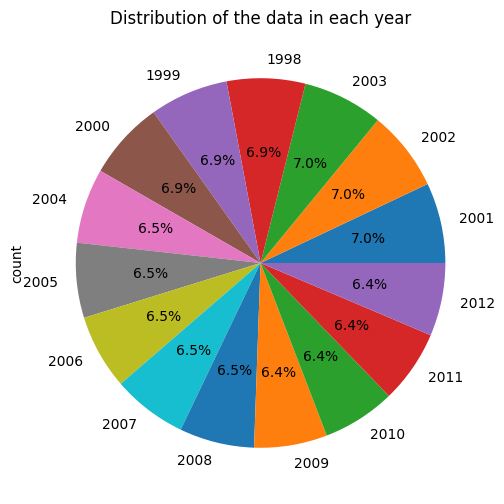

In [196]:
plt.figure(figsize=(8,6))
df2['year'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of the data in each year')
plt.show()

## 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

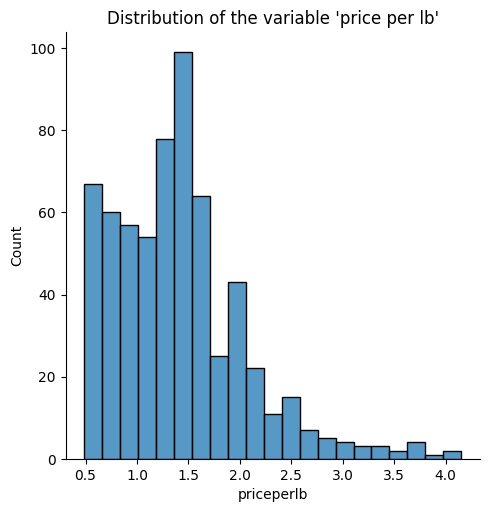

In [197]:
sns.displot(data=df2['priceperlb'])
plt.title("Distribution of the variable 'price per lb'")
plt.show()

#### The average price per pound is mostly 1.5 dollars. It usually ranges between 0.5 dollars and 2 dollars

## 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

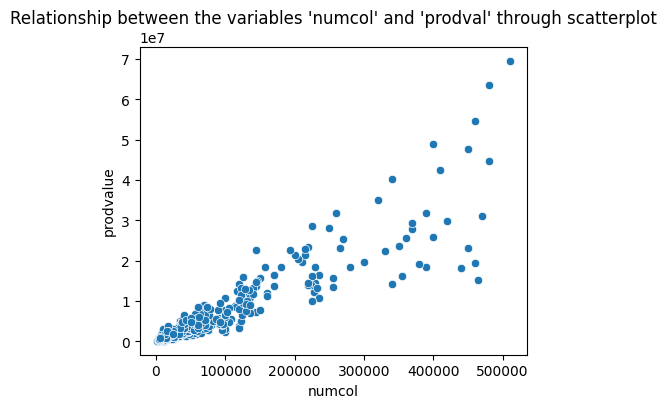

In [198]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df2,x='numcol',y='prodvalue')
plt.title("Relationship between the variables 'numcol' and 'prodval' through scatterplot")
plt.show()

#### The Number of honey producing colonies and Value of production is highly correlated. When there is a increase in numcol, prodvalue also increases.

## 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

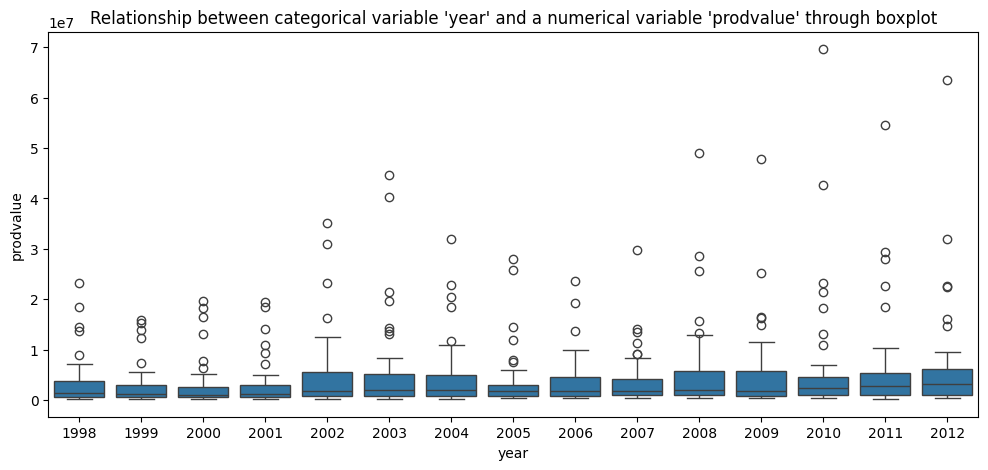

In [199]:
plt.subplots(figsize=(12,5))
sns.boxplot(data=df2,x='year',y='prodvalue')
plt.title("Relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot")
plt.show()

#### There are outliers in all years. There are more outliers in the year 2003. There are less outliers in the year 2006.

## 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

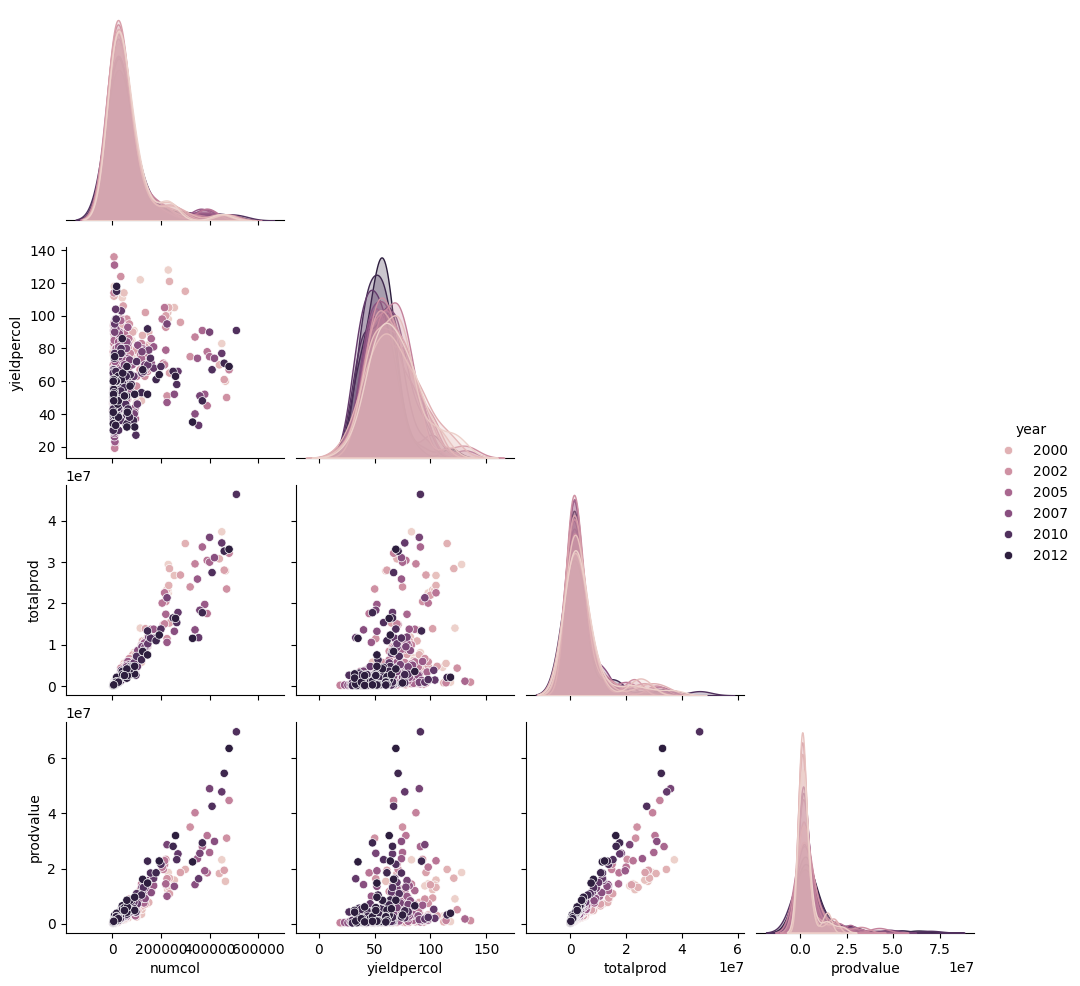

In [200]:
sns.pairplot(df2[['numcol','yieldpercol','totalprod','prodvalue','year']],hue='year',corner=True)
plt.show()

#### numcol has positive correlation with prodvalue and totalprod. totalprod is postively correlated with prodvalue

## 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','total prod', 'stocks', 'price per lb', 'prodvalue')

<Axes: >

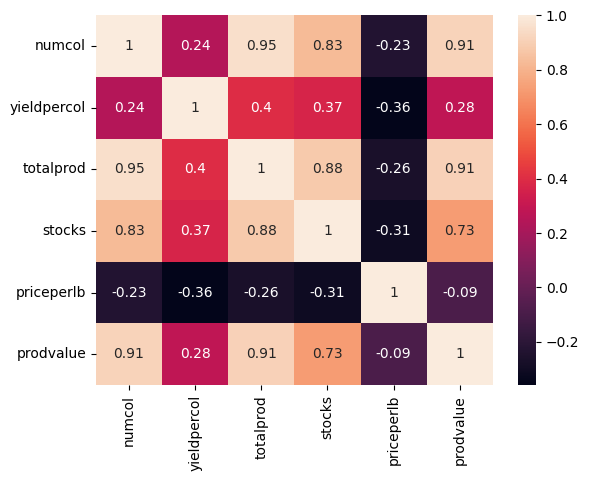

In [201]:
sns.heatmap(df2.drop(columns=['year']).corr(numeric_only=True),annot=True)

#### Highly Positive correlated pairs are numcol and totalprod,numcol and stocks,numcol and prodvalue,totalprod and stocks,totalprod and prodvalue,prodvalue and stocks. priceperlb is negatively correlated with other variables.